In [1]:
import torch
import numpy as np

from src.data.shapenet import ShapeNet
from src.renderer.projection import World2Cam, PerspectiveTransform, RgbContProj, ContProj

%load_ext autoreload

%autoreload 2


{'02691156': 'airplane', '02933112': 'cabinet', '02958343': 'car', '03001627': 'chair', '03636649': 'lamp', '04256520': 'sofa', '04379243': 'table', '04530566': 'watercraft'}


In [2]:
# Load point cloud to render
pcl = np.load(r'D:\Projects\ML3D\ShapeNet_pointclouds\02691156\1a04e3eab45ca15dd86060f189eb133\pointcloud_1024.npy')

# Reshape 
pcl =torch.from_numpy(pcl).view(-1, 1024, 3)
pcl.shape

In [3]:
pcl =torch.from_numpy(pcl).view(-1, 1024, 3)
pcl.shape

torch.Size([1, 1024, 3])

In [30]:
# Create some dummy pose data
# Set the range to something a tanh function can do i.e. between -1 and 1
pose_out = torch.from_numpy(np.reshape(np.pi*np.array((-0.1, -0.7)), (-1,2)))

print(pose_out.shape)

torch.Size([1, 2])


In [5]:
# Initialize projection modules
world2cam = World2Cam()
perspective_transform = PerspectiveTransform()
get_proj_rgb = RgbContProj()
get_proj_mask = ContProj()

In [42]:
def plot_img_and_mask(pcl, pose_out):
    pcl_out_rot = world2cam(pcl, pose_out[0][0], pose_out[0][1], 2., 2., 1)
    pcl_out_pers = perspective_transform(pcl_out_rot, 1)
    img_out = get_proj_rgb(pcl_out_pers, pcl, 1024, 50, 50)
    mask_out = get_proj_mask(pcl_out_pers, 50, 50, 1024, 0.4)
    
    img = img_out[0][0].numpy()
    mask = mask_out[0].numpy()
    
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(img)
    axs[1].imshow(mask)

torch.Size([3, 3])
torch.Size([1, 3, 1024])
torch.Size([1, 1024, 50, 50, 1])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1024, 1, 1, 3])


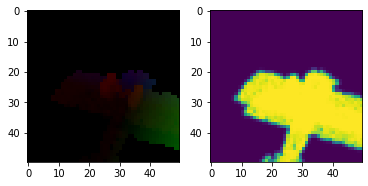

In [43]:
plot_img_and_mask(pcl, pose_out)

torch.Size([3, 3])
torch.Size([1, 3, 1024])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1024, 50, 50, 1])
torch.Size([1, 1024, 1, 1, 3])


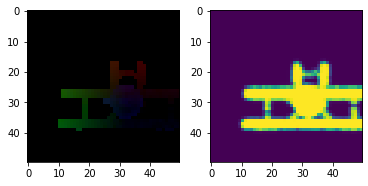

In [44]:
pose_out = torch.from_numpy(np.reshape(np.pi*np.array((1, 1)), (-1,2)))
plot_img_and_mask(pcl, pose_out)

torch.Size([3, 3])
torch.Size([1, 3, 1024])
torch.Size([1, 1024, 50, 50, 1])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1024, 1, 1, 3])


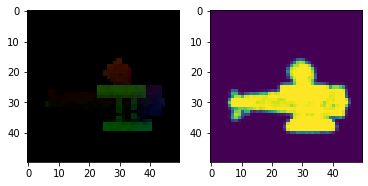

In [47]:
pose_out = torch.from_numpy(np.reshape(np.pi*np.array((-0.5, -1)), (-1,2)))
plot_img_and_mask(pcl, pose_out)

torch.Size([3, 3])
torch.Size([1, 3, 1024])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1024, 50, 50, 1])
torch.Size([1, 1024, 1, 1, 3])


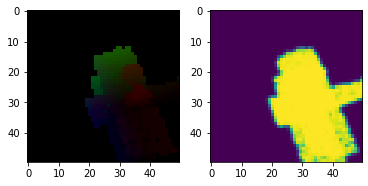

In [49]:
pose_out = torch.from_numpy(np.reshape(np.pi*np.array((0.6, -0.7)), (-1,2)))
plot_img_and_mask(pcl, pose_out)